In [59]:
import re
from TextCleaner import TextCleaner
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import nltk
from langdetect import detect
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem.snowball import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN, SpatialDropout1D
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

# Classifiers
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
pd.options.mode.chained_assignment = None  # default='warn'

In [206]:
df = pd.read_csv('sentiment.csv')
df = df.drop(df.columns[0], axis=1)
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target
0,TedDitchburnNNP,@james198428 @bellacaledonia Salmond works in ...,2021-01-31 22:43:18+00:00,0,RUB,https://twitter.com/TedDitchburnNNP/status/135...,0.0
1,calvin_1287,Not tryna get in rouble but they look like Swa...,2021-01-31 19:01:16+00:00,2,RUB,https://twitter.com/calvin_1287/status/1355954...,0.0
2,GeorgeKushtwit,Rouble farming Andy --- New Emotes https://t.c...,2021-01-31 17:49:32+00:00,0,RUB,https://twitter.com/GeorgeKushtwit/status/1355...,0.0
3,pietka_t,@WilliamtheArti1 @nypost Can you calculate !? ...,2021-01-31 14:57:14+00:00,0,RUB,https://twitter.com/pietka_t/status/1355892907...,0.0
4,Onmeed,The usual suspects who can’t get a gig in UK m...,2021-01-31 13:37:15+00:00,1,RUB,https://twitter.com/Onmeed/status/135587277638...,0.0
...,...,...,...,...,...,...,...
3531,weebo_kun,@SHOWNUBEANER “A British pound sign” why must ...,2021-01-01 05:58:23+00:00,0,GBP,https://twitter.com/weebo_kun/status/134488566...,0.0
3532,threadreaderapp,"@bogustrumper Salam, you can read it here: In ...",2021-01-01 04:38:50+00:00,0,GBP,https://twitter.com/threadreaderapp/status/134...,0.0
3533,trader_blitz,GBP/JPY | $GBPJPY | $GBP $JPY\n\nBRITISH POUND...,2021-01-01 00:42:01+00:00,0,GBP,https://twitter.com/trader_blitz/status/134480...,0.0
3534,Imoteda,@vincentdesmond_ Happy New Year my love!!! I h...,2021-01-01 00:40:48+00:00,1,GBP,https://twitter.com/Imoteda/status/13448057421...,0.0


In [207]:
def sentiments(df):
    if df['target'] >= 0:
        return 'Positive'
    elif df['target'] < 0:
        return 'Negative'
    else:
        return 'Neutral'        

In [4]:
def detect_lang(df):
    return detect(df['Text']) 

In [208]:
df['Sentiment'] = df.apply(sentiments, axis=1)
#df['Language'] = df.apply(detect_lang, axis=1)

In [185]:
#df = df[df['Language'] == 'en']
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target,Sentiment
0,TedDitchburnNNP,@james198428 @bellacaledonia Salmond works in ...,2021-01-31 22:43:18+00:00,0,RUB,https://twitter.com/TedDitchburnNNP/status/135...,0.0,Positive
1,calvin_1287,Not tryna get in rouble but they look like Swa...,2021-01-31 19:01:16+00:00,2,RUB,https://twitter.com/calvin_1287/status/1355954...,0.0,Positive
2,GeorgeKushtwit,Rouble farming Andy --- New Emotes https://t.c...,2021-01-31 17:49:32+00:00,0,RUB,https://twitter.com/GeorgeKushtwit/status/1355...,0.0,Positive
3,pietka_t,@WilliamtheArti1 @nypost Can you calculate !? ...,2021-01-31 14:57:14+00:00,0,RUB,https://twitter.com/pietka_t/status/1355892907...,0.0,Positive
4,Onmeed,The usual suspects who can’t get a gig in UK m...,2021-01-31 13:37:15+00:00,1,RUB,https://twitter.com/Onmeed/status/135587277638...,0.0,Positive
...,...,...,...,...,...,...,...,...
3531,weebo_kun,@SHOWNUBEANER “A British pound sign” why must ...,2021-01-01 05:58:23+00:00,0,GBP,https://twitter.com/weebo_kun/status/134488566...,0.0,Positive
3532,threadreaderapp,"@bogustrumper Salam, you can read it here: In ...",2021-01-01 04:38:50+00:00,0,GBP,https://twitter.com/threadreaderapp/status/134...,0.0,Positive
3533,trader_blitz,GBP/JPY | $GBPJPY | $GBP $JPY\n\nBRITISH POUND...,2021-01-01 00:42:01+00:00,0,GBP,https://twitter.com/trader_blitz/status/134480...,0.0,Positive
3534,Imoteda,@vincentdesmond_ Happy New Year my love!!! I h...,2021-01-01 00:40:48+00:00,1,GBP,https://twitter.com/Imoteda/status/13448057421...,0.0,Positive


In [209]:
data_v1 = df[['Text','Sentiment']]
data_v1.isnull().sum()

Text         0
Sentiment    0
dtype: int64

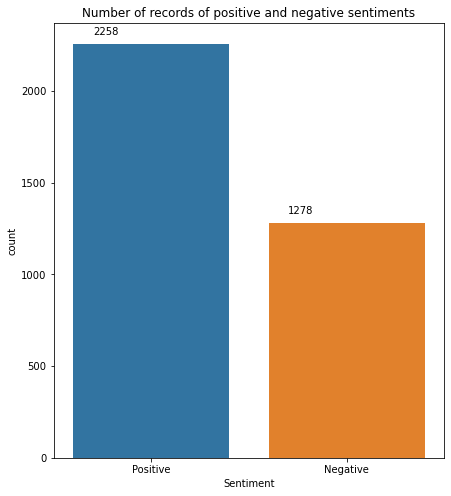

In [210]:
plt.figure(figsize=(7,8))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'Sentiment', data = data_v1)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + 0.1 ,p.get_height()+50))

In [211]:
clean = TextCleaner()
text = clean.convert_emoji_to_text("Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒")
print(text)

text4 = "Hello :-) :-)"
resp = clean.convert_emoticons(text4)
print(resp)

Hilarious face with tears of joy. The feeling of making a sale smiling face with sunglasses, The feeling of actually fulfilling orders unamused face
Hello Happy face smiley Happy face smiley


In [189]:
def port_stemmer(words):
    words = [PorterStemmer().stem(w) for w in words]
    print(words)
    return words

In [212]:
clean = TextCleaner()

def cleaning(df_cl, stop_words):
    
    # Lowercase
    df_cl['Text'] = df_cl['Text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    
    # Remove Non -letters
    df_cl['Text'] = df_cl['Text'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", ' ', x))
    
    # Removing URLs
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub(r'http\S+', '', x))
    
    # Removing Punctuation
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub(r'[^\w\s]','', x))
    
    # Removing stop words
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
    
    # Removing mentioned author names
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub("@[A-Za-z0-9]+","", x))

    # Lemmatization
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join([Word(x).lemmatize() for x in x.split()]))
    
    # Emoticons
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))
    
    # Emojis
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))    
    
    # Stemming
    #df_cl['Text'] = df_cl['Text'].apply(lambda x: port_stemmer(x))
    return df_cl

stop_words = stopwords.words('english')
data_v1 = cleaning(data_v1, stop_words)

In [213]:
data_v1

,Text,Sentiment
0,james198428 bellacaledonia salmond work putin ...,Positive
1,tryna get rouble look like swae lee,Positive
2,rouble farming andy new emotes co hifyk6olyj,Positive
3,williamthearti1 nypost calculate russia debt a...,Positive
4,usual suspect get gig uk medium work russia to...,Positive
...,...,...
3531,shownubeaner british pound sign must literal sir,Positive
3532,bogustrumper salam read september 1992 hungari...,Positive
3533,gbp jpy gbpjpy gbp jpy british pound brexit br...,Positive
3534,vincentdesmond happy new year love hope year f...,Positive


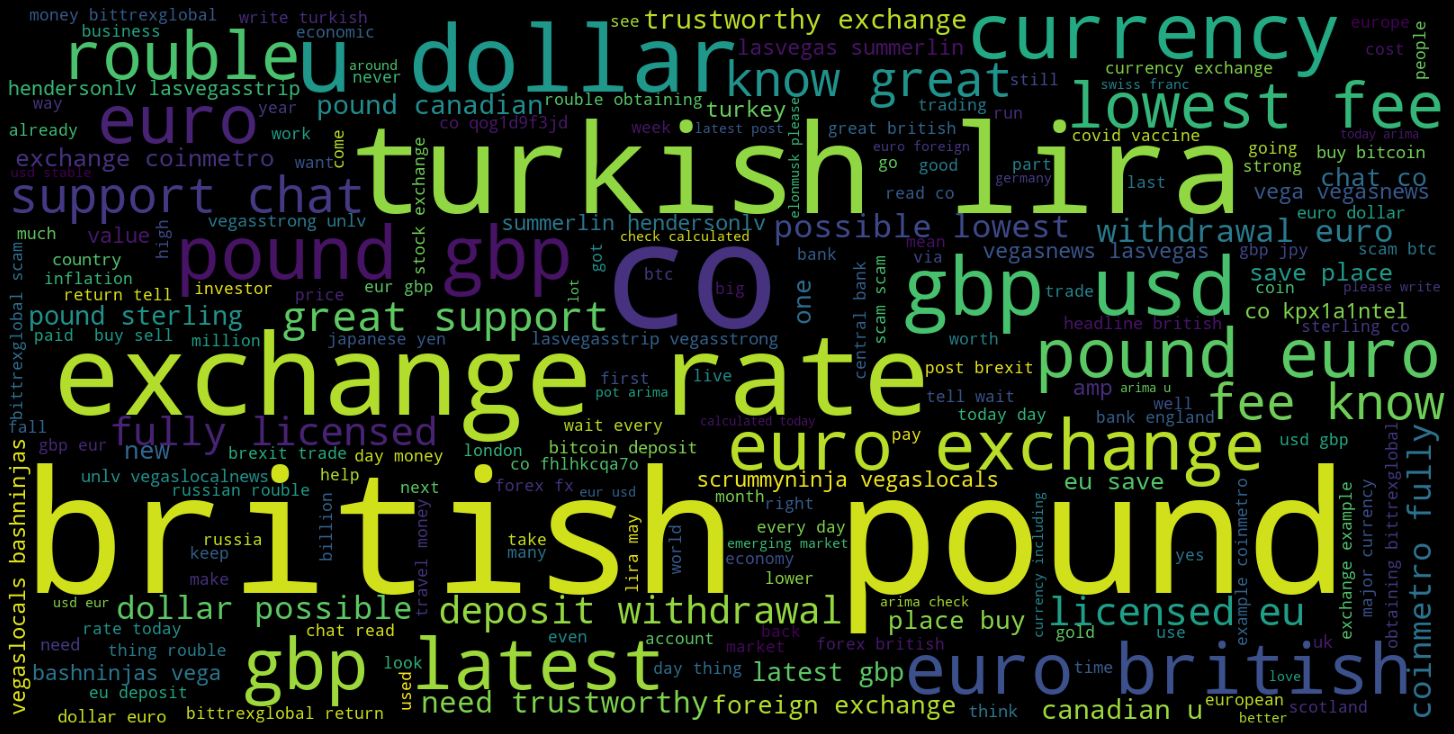

In [192]:
common_words = ''
for i in data_v1.Text:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = WordCloud(width=1600, height=800).generate(common_words)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [193]:
lb = LabelEncoder()
data_v1['Sentiment'] = lb.fit_transform(data_v1['Sentiment'])

In [200]:
tokenizer = Tokenizer(num_words=5000, split=' ', lower=True) 
tokenizer.fit_on_texts(data_v1['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X)

In [201]:
y = pd.get_dummies(data_v1['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<h3>Defining Classifiers</h3>

In [202]:
models = [ 'SimpleRNN', 'LSTM', 'GRU']

In [203]:
from keras.metrics import Precision, Recall
def build_model(nb_words, _model="SimpleRNN", embedding_matrix=None):
    model = Sequential()
    model.add(Embedding(500, 120, input_length = nb_words))
    if _model == "SimpleRNN":
        model.add(SimpleRNN(200))
    elif _model == "LSTM":
        model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
    elif _model == "GRU":
        model.add(GRU(200))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae', 'mape'])
    return model

In [204]:
scaler = MinMaxScaler()
#dataset = np.array(df['target'])
#dataset = dataset.reshape(-1,1)
X = scaler.fit_transform(X)

In [46]:
X.shape[1]

25

In [205]:
batch_size = 64
for model_ in models:
    print("Model : ", model_)
    model_ = build_model(X.shape[1], model_, None)
    print("Model Summary")
    print(model_.summary())
    model_.fit(X_train, y_train, epochs=5, batch_size=batch_size, verbose = 'auto', validation_data=(X_test,y_test))
    #predictions = model_.predict(X_test)
    #print(classification_report(y_test, predictions))
   
    y_pred = model_.predict(X_test)

    '''y_test = scaler.inverse_transform(y_test)
    y_pred = scaler.inverse_transform(y_pred)
    print(mean_squared_error(y_test,y_pred))
    print(classification_report(y_test, y_pred))'''

    model_.evaluate(X_test, y_test)
    print("")
    print("")
    print("")

Model :  SimpleRNN
Model Summary
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_74 (Embedding)     (None, 75, 120)           60000     
_________________________________________________________________
simple_rnn_53 (SimpleRNN)    (None, 200)               64200     
_________________________________________________________________
dense_74 (Dense)             (None, 2)                 402       
Total params: 124,602
Trainable params: 124,602
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


InvalidArgumentError:  indices[37,69] = 2047 is not in [0, 500)
	 [[node sequential_75/embedding_74/embedding_lookup (defined at <ipython-input-205-14412ec7047e>:7) ]] [Op:__inference_train_function_444894]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_75/embedding_74/embedding_lookup:
 sequential_75/embedding_74/embedding_lookup/444288 (defined at /opt/anaconda3/lib/python3.8/contextlib.py:113)

Function call stack:
train_function


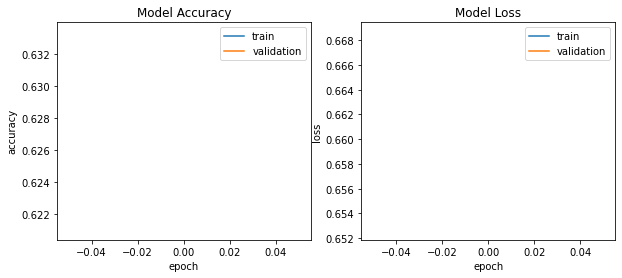

In [142]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [ ]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words = [word for word in stemmed_words]
    return non_stop_words

In [ ]:
count_vectorizer =  CountVectorizer(stop_words= stop_words, max_features= 1000)
feature_vector =  count_vectorizer.fit(data_v2['Text'])
train_ds_features =  count_vectorizer.transform(data_v2['Text'])
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))
features_counts.sort_values("counts", ascending= False)[0:15]
features_counts

In [ ]:
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, data_v2['Sentiment'], test_size = 0.3, random_state = 42)

In [ ]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

for name, sklearn_classifier in classifiers.items():
    print("Classifier : ", name)
    sklearn_classifier.fit(train_x.toarray(), train_y)
    test_ds_predicted = sklearn_classifier.predict(test_x.toarray())
    print(metrics.classification_report(test_y,test_ds_predicted))
    print("------------------------------------------------------")
    '''print('MAE: %f' % mean_absolute_error(test_y, test_ds_predicted))
    print('MSE: %f' % mean_squared_error(test_y, test_ds_predicted))
    print('RMSE: %f' % sqrt(mean_squared_error(test_y, test_ds_predicted)))
    print('MAPE: %f' % MAPE(test_y, test_ds_predicted))'''
    print("")
    print("")

In [ ]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100